
# DLR data visualization
### 2018/12/17 
### KF
### https://tianchi.aliyun.com/notebook/detail.html?spm=5176.8366600.0.0.c980311fH3xm8u&id=40160


In [3]:
!ls -lh /home/kefeng/German_AI_Challenge/dataset/validation.h5
!ls -lh /home/kefeng/German_AI_Challenge/dataset/round1_test_a_20181109.h5

-rw-r--r-- 1 kefeng kefeng 3.4G Oct  2 01:04 /home/kefeng/German_AI_Challenge/dataset/validation.h5
-rw-rw-r-- 1 kefeng kefeng 681M Oct 31 20:29 /home/kefeng/German_AI_Challenge/dataset/round1_test_a_20181109.h5


In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
fid_validation = h5py.File("/home/kefeng/German_AI_Challenge/dataset/validation.h5", 'r')
valid_s1=fid_validation['sen1']
valid_s2=fid_validation['sen2']
valid_label=fid_validation['label']
# convert one hot to explicit category 
valid_label_cat = np.array(np.argmax(valid_label, axis=1))

# get a sub set for quick visualization
valid_5k_s1=fid_validation['sen1'][:5000]
valid_5k_s2=fid_validation['sen2'][:5000]
valid_5k_label=fid_validation['label'][:5000]
# convert one hot to explicit category 
valid_5k_label_cat = np.array(np.argmax(valid_5k_label, axis=1))

fid_test = h5py.File("/home/kefeng/German_AI_Challenge/dataset/round1_test_a_20181109.h5", "r")
test_s1=fid_test['sen1']
test_s2=fid_test['sen2']

# Explaination of each LCZ category

In [7]:
lcz_cls={
    1:'compact h',
    2:'compact m',
    3:'compact l',
    4:'open h',
    5:'open m',
    6:'open l',
    7:'light l',
    8:'large l',
    9:'sparsly built',
    10:'heavy',
    11:'dense tree',
    12:'scatter tree',
    13:'bush',
    14:'low plants',
    15:'bare rock',
    16:'bare soil',
    17:'water'
}

# Build the indices list for each category

In [12]:
cls_lists=[[] for i in range(17)]
for id,i in enumerate(valid_label_cat):
  cls_lists[i].append(id)
print(len(cls_lists))

cls_lists_5k=[[] for i in range(17)]
for id,i in enumerate(valid_5k_label_cat):
  cls_lists_5k[i].append(id)
print(len(cls_lists_5k))

17
17


# Distribution of values

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

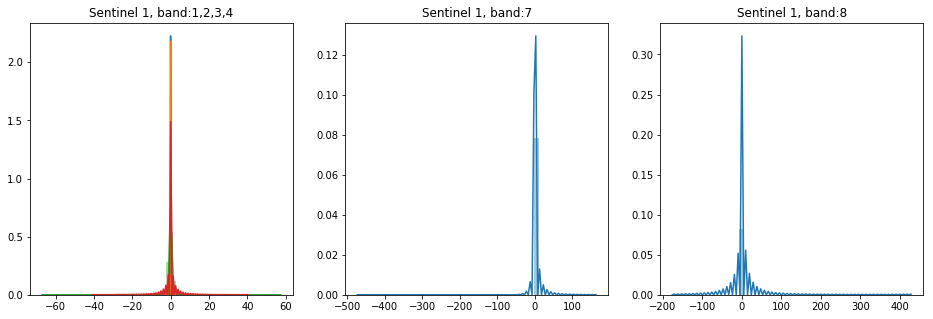

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
  
fig, axs = plt.subplots(1,3, figsize=(16,5))
for iband in range(0,4):
  sns.distplot(test_s1[...,iband].flatten(), ax = axs[0])
axs[0].set_title('Sentinel 1, band:1,2,3,4')

sns.distplot(test_s1[...,6].flatten(), ax = axs[1])
axs[1].set_title('Sentinel 1, band:7')

sns.distplot(test_s1[...,7].flatten(), ax = axs[2])
axs[2].set_title('Sentinel 1, band:8')

plt.show()

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


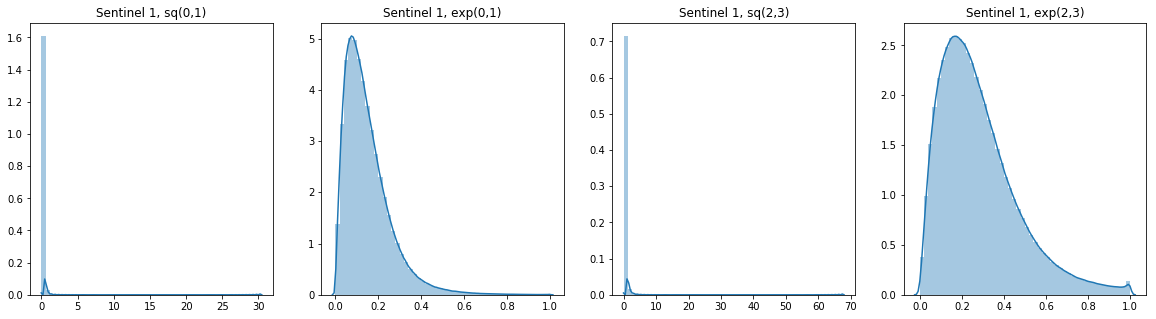

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
  
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for i0,i1 in ((0,1),(2,3)):
    data_0 = test_s1[...,i0].flatten()
    data_1 = test_s1[...,i1].flatten()
    data_norm = np.sqrt(np.square(data_0) + np.square(data_1))
    data_exp = 1-np.exp(np.negative(data_norm))
    sns.distplot(data_norm, ax = axs[i0])
    axs[i0].set_title('Sentinel 1, sq(' + str(i0) + ',' + str(i1) + ')')
    sns.distplot(data_exp, ax = axs[i1])
    axs[i1].set_title('Sentinel 1, exp(' + str(i0) + ',' + str(i1) + ')')

plt.show()

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

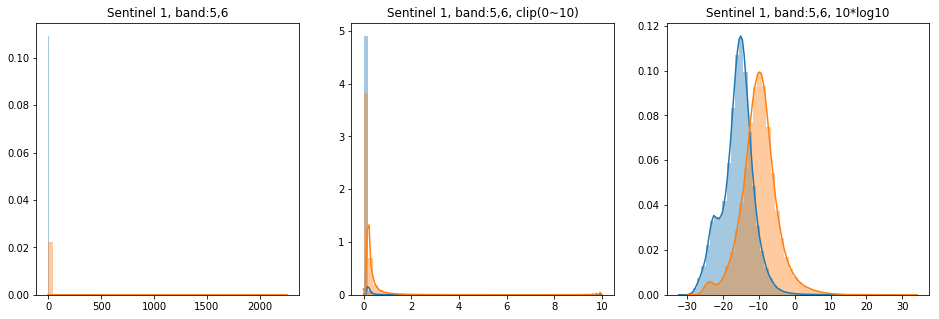

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
  
fig, axs = plt.subplots(1,3, figsize=(16,5))
for iband in range(4,6):
  data = test_s1[...,iband].flatten()
  sns.distplot(data, ax=axs[0])
  sns.distplot(np.clip(data,0,10), ax=axs[1])
  sns.distplot(10*np.log10(data), ax=axs[2])

axs[0].set_title('Sentinel 1, band:5,6')
axs[1].set_title('Sentinel 1, band:5,6, clip(0~10)')
axs[2].set_title('Sentinel 1, band:5,6, 10*log10')

plt.show()

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

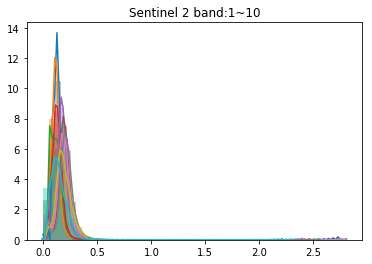

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
  
for iband in range(10):
  sns.distplot(test_s2[...,iband].flatten())
plt.title('Sentinel 2 band:1~10')
plt.show()

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kefeng/anaconda3/lib/python3.6

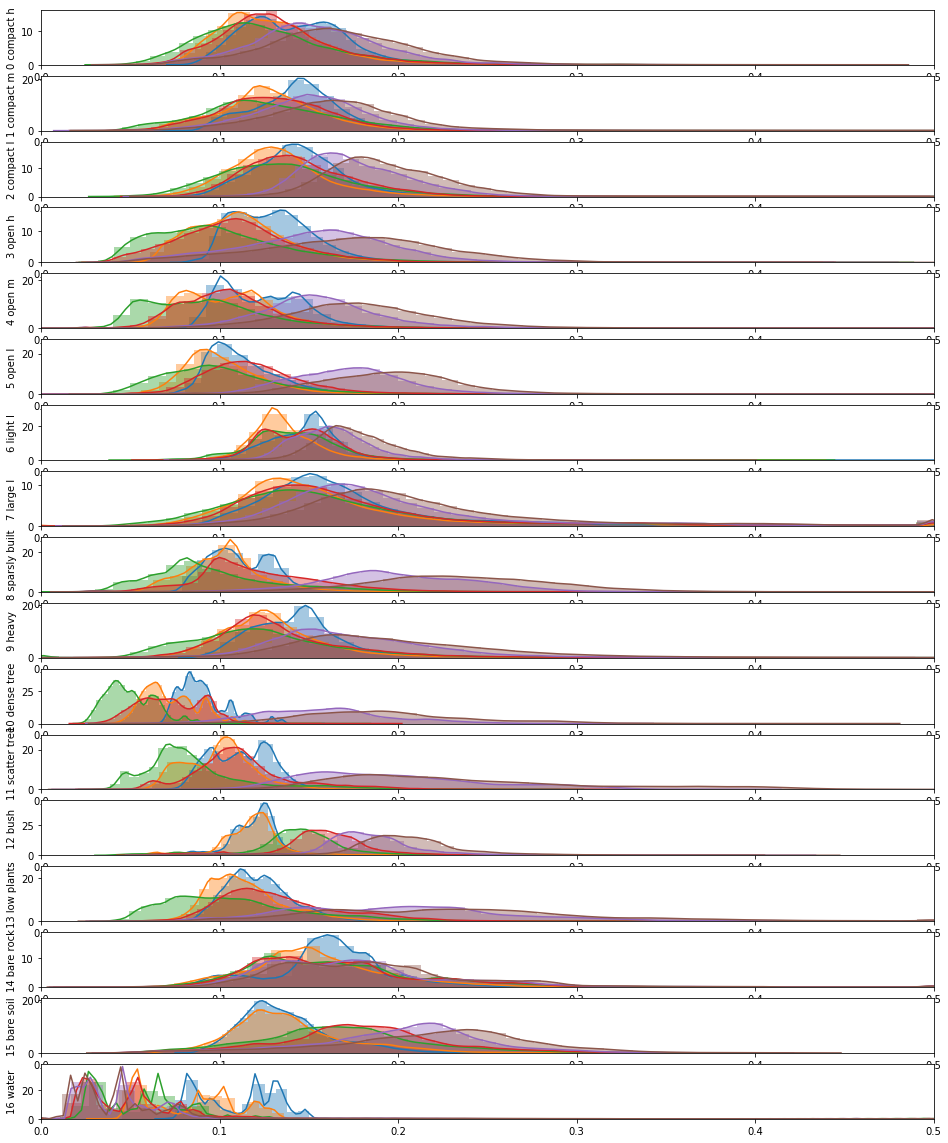

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(17,1, figsize=(16,1.2*17))
for icat in range(17):
  for iband in range(6):
    ax = axs[icat]
    data = valid_5k_s2[cls_lists_5k[icat],:,:,iband].flatten()
    data = np.clip(data, 0, 0.5)
    sns.distplot(data, ax=ax)
    ax.set_ylabel(str(icat) + ' ' + lcz_cls[icat+1]) 
    ax.set_xlim(0, 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


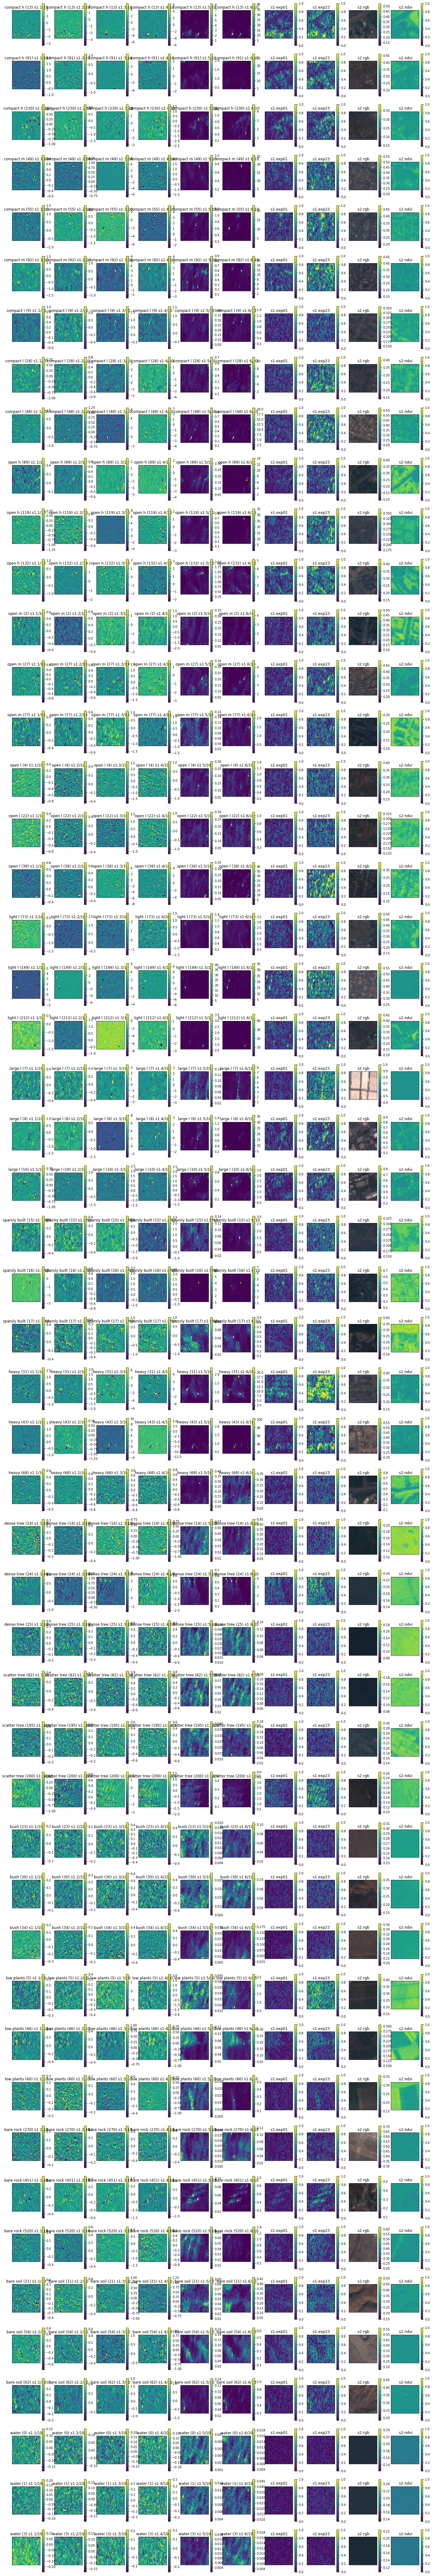

In [19]:
from math import floor

f, axs = plt.subplots(3*17, 10, figsize=(3*8, 3*3*17))

for irow in range(17):
  idx = cls_lists_5k[irow]
  for idata in range(3):
    id = idx[idata]
    lcz = lcz_cls[1+valid_5k_label_cat[id]] + ' (' + str(id)+')'
    idata_row = idata + irow*3
    icol = 0
    for iband in [0,1,2,3,4,5]:
      ax = axs[idata_row, icol]
      icol+=1
      data = valid_s1[id,:,:,iband].astype('float32')
      cf = ax.imshow(data)
      ax.set_title(lcz + ' s1:' + str(iband+1) + '/10')
      f.colorbar(cf, ax=ax)
      ax.set_xticks([])
      ax.set_yticks([])   
    
    ax = axs[idata_row, icol]
    icol+=1
    data_0 = valid_s1[id,:,:,0].astype('float32')
    data_1 = valid_s1[id,:,:,1].astype('float32')
    data = np.sqrt(np.square(data_0) + np.square(data_1))
    data = 1-np.exp(np.negative(data))
    cf = ax.imshow(data, vmin=0,vmax=1)
    ax.set_title(' s1:exp01')
    f.colorbar(cf, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])  

    ax = axs[idata_row, icol]
    icol+=1
    data_0 = valid_s1[id,:,:,2].astype('float32')
    data_1 = valid_s1[id,:,:,3].astype('float32')
    data = np.sqrt(np.square(data_0) + np.square(data_1))
    data = 1-np.exp(np.negative(data))
    cf = ax.imshow(data, vmin=0,vmax=1)
    ax.set_title(' s1:exp23')
    f.colorbar(cf, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])  

    ax = axs[idata_row, icol]
    icol+=1
    data = np.flip(valid_s2[id,:,:,:3].astype('float32')*2, axis=-1)
    cf = ax.imshow(data)
    ax.set_title(' s2:rgb')
    f.colorbar(cf, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([]) 
    
    ax = axs[idata_row, icol]
    icol+=1
    data_0 = valid_s2[id,:,:,2].astype('float32')
    data_1 = valid_s2[id,:,:,6].astype('float32')
    data = (data_1-data_0)/(data_1+data_0) * 0.5 + 0.5
    cf = ax.imshow(data, vmin=0,vmax=1)
    ax.set_title(' s2:ndvi')
    f.colorbar(cf, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([]) 
    
plt.show()